![hslu_logo.png](img/hslu_logo.png)

## Week 01

<hr style="border:1px solid black">

# Excercise: Single-Layer-Perceptron using PyTorch
---
---
This excercise is to illustrate the single layer perceptrion through application on synthetic 2D-classification problems.

### Import necessary packages

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

from utils import create_data, plot_img, plot_data

#### Test the creation of data

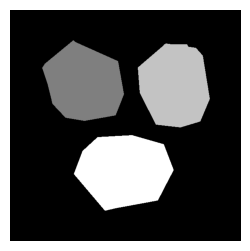

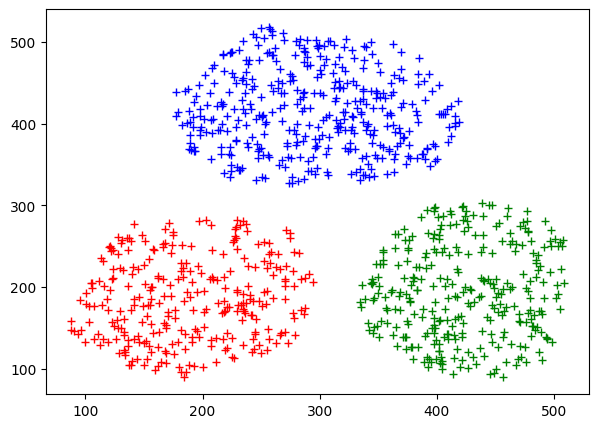

In [3]:
x,y,img = create_data(1000, imgName='Regions00.png')

plot_img(img)

plot_data(x,y)

#### Define the neural network

In [ ]:
class SingleLayerPerceptron:
    """
    Single layer Perceptron class doing the forward and backward step
    """
    def __init__(self, num_input, num_output):
        """
        constructor

        Arguments:
        num_input -- number of input values
        num_output -- number of output values (categories)
        
        """
        self.model = torch.nn.Sequential(
            ### START YOUR CODE ###*
            torch.nn.Linear(num_input, num_output),
            # torch.nn.Softmax(dim=1) --> Not required. because it is included 
            ### END YOUR CODE ###*
        )
                         
        self.cost_fn = torch.nn.CrossEntropyLoss(reduction='mean')
        
    def propagate(self, X):
        """
        calculates the function estimation based on current parameters [W,B]
        """    
        self.Y_pred = self.model(X)
           
     
    def back_propagate(self, cost):
        """
        calculates the backpropagation results based on expected output y
        this function must be performed AFTER the corresponding propagte step
        """    
        self.model.zero_grad()
        
        cost.backward()
 

    def calc_cost(self, Y):
        """
        calculates the MSE loss function
        """
        cost = self.cost_fn(self.Y_pred, Y)
        
        return cost
    
        
        
    def gradient_descend(self, alpha):
        """
        does the gradient descend based on results from last back_prop step with learning rate alpha
        """
        with torch.no_grad():
            for param in self.model.parameters():
                param -= alpha * param.grad
            
     
        
    def calc_error(self, Y):
        """
        get error information
        """
        m = Y.shape[0]

        Y_pred_argmax = torch.argmax(self.Y_pred, dim=1)
        train_error = torch.sum(Y != Y_pred_argmax) / m

        return train_error

        
        
    def optimize(self, data, epochs, alpha, debug=0):
        """
        performs epochs number of gradient descend steps and appends result to output array

        Arguments:
        data -- dictionary with data
        epochs -- number of epochs
        alpha -- learning rate
        debug -- False (default)/True; get info on each gradient descend step
        """
        
        # save results before 1st step
        for i0 in range(0, epochs):
            #do prediction
            self.propagate(data['X_train'])
            #determine the loss 
            cost = self.calc_cost(data['Y_train'])
            #determine the error
            self.back_propagate(cost)
            #do the correction step
            self.gradient_descend(alpha)
            #calculate the error
            error = self.calc_error(data['Y_train'])
            
            if debug and np.mod(i0, debug) == 0:
                print('step %r, cost %r, error %r' % (i0, cost.item(), error.item()))
                        
            

#### Create the data

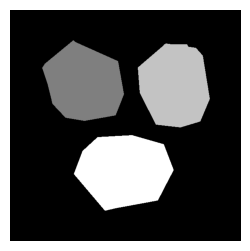

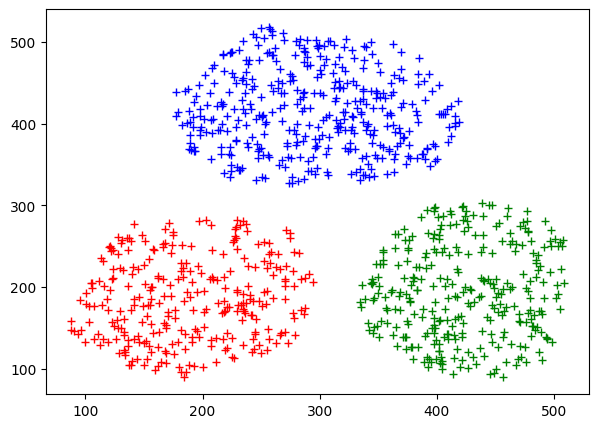

In [15]:
x,y,img = create_data(1000, imgName='Regions00.png')

plot_img(img)

plot_data(x,y)

#### Conversion to torch tensor and normalisation 

Training is more robust if the data is normalised such that all features have the same scale. Two typical schemes exist:
- min-max-rescaling:
  Data is scaled to interval $[0,1]$
- min-max-normalization
  Data is scaled to interval $[-1,1]$

Type conversion is also important because PyTorch is very strict on type compatibility!

In [16]:
#convert to tensor
data_X = torch.tensor(x, dtype=torch.float32)
data_Y = torch.tensor(y, dtype=torch.int64)

#normalize data: original data is overwritten
data_min, data_max = torch.min(data_X), torch.max(data_X)
print('original min-max values are: %r, %r and type %r' % (data_min.item(), data_max.item(), data_min.dtype))

normalize_tpye = 1

if normalize_tpye == 0:
    #min-max-rescaling
    data_X = (data_X - data_min) / (data_max - data_min)    
else:
    #min-max-normalization
    data_X = 2*(data_X - data_min) / (data_max - data_min) - 1

data_min, data_max = torch.min(data_X), torch.max(data_X)
print('now min-max values are: %r, %r and type %r' % (data_min.item(), data_max.item(), data_min.dtype))


original min-max values are: 87.47126007080078, 518.8117065429688 and type torch.float32
now min-max values are: -1.0, 1.0 and type torch.float32


#### Setup Perceptron and do optimization

In [17]:
data = {'X_train' : data_X, 'Y_train' : data_Y}

num_input = data_X.shape[1]
num_output = len(torch.unique(data_Y))

slp = SingleLayerPerceptron(num_input, num_output)

slp.optimize(data, 200, 0.5, 50)


step 0, cost 1.3496676683425903, error 0.7080000042915344
step 50, cost 0.24691852927207947, error 0.0
step 100, cost 0.15326105058193207, error 0.0
step 150, cost 0.11678772419691086, error 0.0


#### Visualise the result

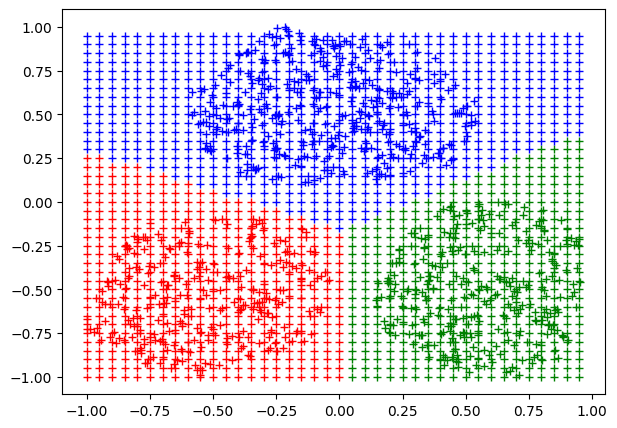

In [18]:
step = 0.05
grid = np.mgrid[-1.:1.:step,-1.:1.:step]

grid_points = grid.reshape(2,int(grid.size/2)).T

y_pred = torch.argmax(slp.model(torch.tensor(grid_points, dtype=torch.float32)),1)
plot_data(np.append(grid_points, data['X_train'],axis=0), np.append(y_pred, data['Y_train']))
#plot_data(grid_points, y_pred_argmax)